# GAN

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

from imagenet_c import corrupt
from imagenet_c.corruptions import (
    gaussian_noise, shot_noise, impulse_noise, defocus_blur,
    glass_blur, motion_blur, zoom_blur, snow, frost, fog,
    brightness, contrast, elastic_transform, pixelate, jpeg_compression,
    speckle_noise, gaussian_blur, spatter, saturate)
from models import Discriminator_MNIST, Generator_MNIST, Discriminator, Generator

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

Using cuda device


In [2]:
CORRUPT_DATASET = False

BATCH_SIZE = 128
# Z_DIM = 10
# HIDDEN_DIM = 64
NB_EPOCHS = 20


## Load data (MNIST)

In [3]:
corruption_transform = transforms.Lambda(
    lambda x: corrupt(np.uint8(x), 
    severity=5,#np.random.randint(1, 6), 
    corruption_name='contrast'))

if CORRUPT_DATASET:
    transform = transforms.Compose([
        corruption_transform,
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ])
else:
    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ])

data = datasets.MNIST(
    root='../data',
    # train=True,
    transform=transform
)


dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)


## Initialize

In [4]:
# Models
# generator = Generator_MNIST().to(device)
# discriminator = Discriminator_MNIST().to(device)
generator = Generator().to(device)
discriminator = Discriminator().to(device)


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
generator.apply(weights_init)
discriminator.apply(weights_init)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optim_generator = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_discriminator = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Fixed noise used to visualize the progression of the generator
fixed_noise = torch.randn(16, generator.z_dim, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

        


Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

## Train

Epoch [1/20] ------------------
[1/20][0/469]	 Loss D: 1.525	 Loss G: 4.950	 D(x): 0.61	 D(G(z)): 0.56/0.01
[1/20][100/469]	 Loss D: 0.000	 Loss G: 38.500	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/20][200/469]	 Loss D: 0.000	 Loss G: 38.072	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/20][300/469]	 Loss D: 0.000	 Loss G: 36.576	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/20][400/469]	 Loss D: 0.316	 Loss G: 3.574	 D(x): 0.80	 D(G(z)): 0.06/0.06


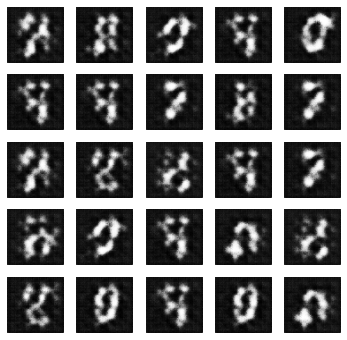

Epoch [2/20] ------------------
[2/20][0/469]	 Loss D: 0.306	 Loss G: 3.253	 D(x): 0.88	 D(G(z)): 0.15/0.05
[2/20][100/469]	 Loss D: 0.356	 Loss G: 2.920	 D(x): 0.86	 D(G(z)): 0.17/0.07
[2/20][200/469]	 Loss D: 0.551	 Loss G: 1.784	 D(x): 0.70	 D(G(z)): 0.13/0.21
[2/20][300/469]	 Loss D: 0.781	 Loss G: 1.881	 D(x): 0.67	 D(G(z)): 0.26/0.19
[2/20][400/469]	 Loss D: 0.451	 Loss G: 2.114	 D(x): 0.82	 D(G(z)): 0.20/0.14


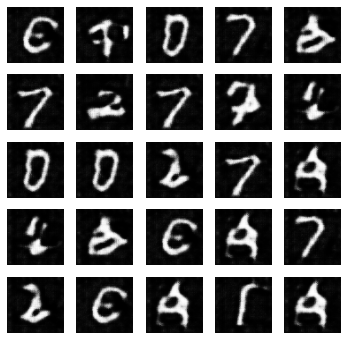

Epoch [3/20] ------------------
[3/20][0/469]	 Loss D: 0.898	 Loss G: 2.856	 D(x): 0.94	 D(G(z)): 0.51/0.08
[3/20][100/469]	 Loss D: 0.350	 Loss G: 2.604	 D(x): 0.87	 D(G(z)): 0.18/0.09
[3/20][200/469]	 Loss D: 0.610	 Loss G: 1.430	 D(x): 0.61	 D(G(z)): 0.05/0.30
[3/20][300/469]	 Loss D: 0.905	 Loss G: 1.467	 D(x): 0.53	 D(G(z)): 0.10/0.28
[3/20][400/469]	 Loss D: 0.225	 Loss G: 3.111	 D(x): 0.93	 D(G(z)): 0.13/0.06


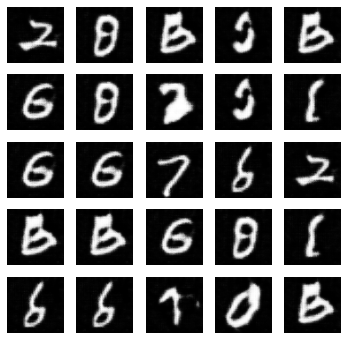

Epoch [4/20] ------------------
[4/20][0/469]	 Loss D: 0.480	 Loss G: 1.970	 D(x): 0.68	 D(G(z)): 0.06/0.18
[4/20][100/469]	 Loss D: 0.298	 Loss G: 3.001	 D(x): 0.85	 D(G(z)): 0.11/0.06
[4/20][200/469]	 Loss D: 1.823	 Loss G: 7.466	 D(x): 0.99	 D(G(z)): 0.77/0.00
[4/20][300/469]	 Loss D: 0.502	 Loss G: 4.344	 D(x): 0.90	 D(G(z)): 0.30/0.02
[4/20][400/469]	 Loss D: 0.130	 Loss G: 3.829	 D(x): 0.92	 D(G(z)): 0.04/0.03


In [5]:
losses_discriminator = []
losses_generator = []

for epoch in range(NB_EPOCHS):
    print(f'Epoch [{epoch+1}/{NB_EPOCHS}] ------------------')
    for batch_idx, data in enumerate(dataloader):

        # Generate batch of fake images from noise
        noise = torch.randn(BATCH_SIZE, generator.z_dim, 1, 1, device=device)
        fake_images = generator(noise)

        ### DISCRIMINATOR ###

        # Discriminate fake images
        output_0 = discriminator(fake_images.detach()).view(-1)
        discriminator_labels_fake = torch.full_like(output_0, fill_value=fake_label, device=device) # output should be 0 (fake)
        loss_discriminator_fake = criterion(output_0, discriminator_labels_fake)
        # Brackpropagation for discriminator on fake images
        optim_discriminator.zero_grad()
        loss_discriminator_fake.backward()

        # Discriminate real images
        real_images = data[0].to(device)
        output_1 = discriminator(real_images).view(-1)
        discriminator_labels_real = torch.full_like(output_1, fill_value=real_label, device=device) # output should be 1 (real)
        loss_discriminator_real = criterion(output_1, discriminator_labels_real)
        # Brackpropagation for discriminator on real images
        loss_discriminator_real.backward() # don't set gradients to zero, accumulate with previous ones

        # Update discriminator
        optim_discriminator.step()


        ### GENERATOR ###

        output_2 = discriminator(fake_images).view(-1)
        generator_labels = torch.full_like(output_2, fill_value=real_label, device=device) # output should be 1 (discriminated as real)
        loss_generator = criterion(output_2, generator_labels)

        # Backpropagation
        optim_generator.zero_grad()
        loss_generator.backward()

        # Update generator
        optim_generator.step()


        ### LOG AND DISPLAY ###
        
        losses_discriminator.append(loss_discriminator_fake.item()+loss_discriminator_real.item())
        losses_generator.append(loss_generator.item())

        if (batch_idx % 100 == 0):
            print('[{}/{}][{}/{}]\t Loss D: {:.3f}\t Loss G: {:.3f}\t D(x): {:.2f}\t D(G(z)): {:.2f}/{:.2f}'.format(epoch+1, NB_EPOCHS, batch_idx, len(dataloader),
            losses_discriminator[-1], losses_generator[-1], output_1.mean().item(), output_0.mean().item(), output_2.mean().item()))

    # Plot generated samples
    imgs = generator(fixed_noise).detach().cpu().numpy()
    fig = plt.figure(figsize=(6, 6))
    rows, cols = 5, 5
    for i in range(1, rows*cols+1):
        sample_idx = torch.randint(len(imgs), size=(1,)).item()
        img = imgs[sample_idx]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()
